In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

ft_size = 15

In [2]:
# IMU, 6 layers
# acc with different query layer
# Load the CSV file
file_path = '../data/ground_truth_lora_ground_truth_harsmart_speculative.csv'
data = pd.read_csv(file_path, header=None)

# Extract the 9th column (index 8 since it's zero-based)
query_dynamic_acc_1 = data.iloc[:, 3].tolist()

query_dynamic_acc_10 = data.iloc[:, 6].tolist()

# number of sample at different layer exit 
layers = np.loadtxt('../data/layers-harsmart.txt') + 1
layers
# Count the occurrences of each layer
unique_layers, counts = np.unique(layers, return_counts=True)

unique_layers = np.append(unique_layers, 6)
counts = np.append(counts, 2)

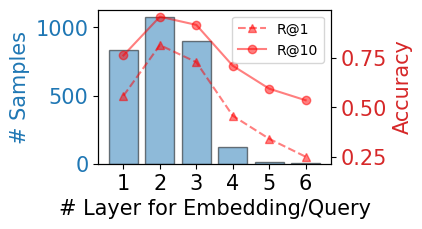

In [5]:
# IMU, HARSMART
fig, ax1 = plt.subplots(figsize=(3, 2))
# 绘制直方图
ax1.set_ylabel('# Samples', color='tab:blue', fontsize=ft_size)
ax1.bar(unique_layers, counts, edgecolor='black', color='tab:blue',alpha=0.5, tick_label=unique_layers)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=ft_size)
ax1.set_xticks(unique_layers, [1, 2, 3, 4, 5, 6], fontsize=ft_size)

# # 创建一个共享x轴的第二个轴用于绘制层均值
ax2 = ax1.twinx()  # 共享x轴
# ax2.set_xlabel('Layer Key')
ax2.set_ylabel('Accuracy', color='tab:red', fontsize=ft_size)
ax2.plot(unique_layers, query_dynamic_acc_1, 'r--', label='R@1', marker='^', alpha=0.5)  # 'r-' 表示红色实线
ax2.plot(unique_layers, query_dynamic_acc_10, 'r-', label='R@10', marker='o', alpha=0.5)  # 'r-' 表示红色实线
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=ft_size)

ax1.set_xlabel('# Layer for Embedding/Query', fontsize=ft_size)
plt.legend()
plt.savefig('../figs/design-query-harsmart.pdf', bbox_inches='tight')

In [9]:
(836 + 1075 + 903) / (836 + 1075 + 903 + 11 +2)

0.9954014856738592

In [51]:
# Flickr, 24 layers for text, 32 for img
# acc with different query layer
# query_dynamic_acc = [0.5585341024770953, 0.8157448252460129, 0.7292161520190024, 0.4574143196470987, 0.34034611469290804, 0.2494061757719715]

# number of sample at different layer exit 
layers = np.loadtxt('../data/layers-flickr8k.txt') + 1
layers
# Count the occurrences of each layer
unique_layers, counts = np.unique(layers, return_counts=True)

unique_layers = np.append(unique_layers, 6)
counts = np.append(counts, 0)

In [52]:
import pandas as pd

# Load the CSV file
file_path = '../data/ground_truth_lora_ground_truth_flicker_speculative.csv'
data = pd.read_csv(file_path, header=None)

# Extract the 9th column (index 8 since it's zero-based)
query_dynamic_acc_1 = data.iloc[:, 5].tolist()

query_dynamic_acc_10 = data.iloc[:, 8].tolist()
# query_dynamic_acc = [0.0142063001852995,
#  0.019147621988882,
#  0.0271772699197035,
#  0.0389129092032118,
#  0.0315009264978381,
#  0.0321185917232859,
#  0.041383570105003,
#  0.0345892526250772,
#  0.0444718962322421,
#  0.0611488573193329,
#  0.0809141445336627,
#  0.0951204447189623,
#  0.1334156886967263,
#  0.192093885114268,
#  0.2217418159357628,
#  0.2384187770228536,
#  0.2859789993823348,
#  0.3174799258801729,
#  0.3458925262507721,
#  0.3687461395923409,
#  0.3792464484249537,
#  0.3798641136504014,
#  0.3539530574428659,
#  0.3256022235948116]

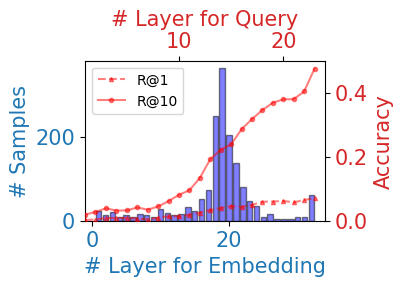

In [59]:
fig = plt.figure(figsize=(3, 2))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plotting the bar chart on the first axes
ax1.bar(unique_layers, counts, edgecolor='black',color='blue', alpha=0.5)
ax1.set_xlabel('# Layer for Embedding', color='tab:blue', fontsize=ft_size)
ax1.set_ylabel('# Samples', color='tab:blue', fontsize=ft_size)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=ft_size)
ax1.tick_params(axis='x', labelcolor='tab:blue', labelsize=ft_size)
# ax1.set_title('Layer Analysis')

# Add a second independent axes
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8], frame_on=False)  # Second axes, same position as ax1
ax2.plot(range(len(query_dynamic_acc_1)), query_dynamic_acc_1, 'r--', marker='^', markersize=3, alpha=0.5, label='R@1')
ax2.plot(range(len(query_dynamic_acc_10)), query_dynamic_acc_10, 'r-', marker='o', markersize=3, alpha=0.5, label='R@10')
ax2.xaxis.tick_top()  # Move the x-axis to the top
ax2.yaxis.tick_right()  # Move the y-axis to the right
ax2.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax2.yaxis.set_label_position('right')  # Move the y-axis label to the right
ax2.set_xlabel('# Layer for Query', color='tab:red', fontsize=ft_size)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=ft_size)
ax2.tick_params(axis='x', labelcolor='tab:red', labelsize=ft_size)
ax2.set_ylabel('Accuracy', color='tab:red', fontsize=ft_size)

ax2.set_xlim(1, 24)  # Set the limits of the line plot x-axis
ax2.set_ylim(0, 0.5)  # Set the limits of the line plot y-axis

plt.legend()
plt.savefig('../figs/design-query-flickr.pdf', bbox_inches='tight')
plt.show()

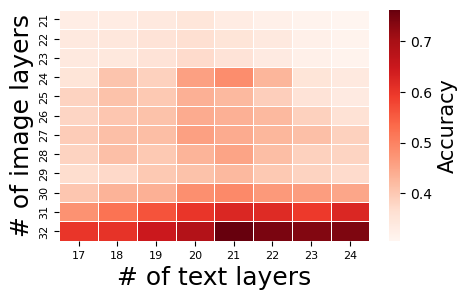

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load the data
file_path = '../data/test_twitter_origin_unbalanced.csv'  # 修改为实际的文件路径
data = pd.read_csv(file_path)

# Select the first three columns and rename them for clarity
data_subset = data.iloc[:, :3]
data_subset.columns = ['X', 'Y', 'Value']
# It appears there are duplicate entries for the combination of X and Y, which prevents pivoting.
# We need to aggregate these values first. One approach is to average the values for duplicate X, Y pairs.

# Aggregate data by averaging values for duplicate X, Y pairs
aggregated_data = data_subset.groupby(['X', 'Y']).mean().reset_index()

filtered_data = aggregated_data[(aggregated_data['X'] > 20) & (aggregated_data['Y'] > 16)]

# Create a pivot table to reshape the data for the heatmap
heatmap_data = filtered_data.pivot(index='X', columns='Y', values='Value') +0.3

# Plot the heatmap
plt.figure(figsize=(5, 3))
ax = sns.heatmap(heatmap_data, cmap='Reds', cbar_kws={'label': 'Accuracy'}, linecolor='white', linewidths=0.5)
# plt.title('Heatmap of Values')
plt.xlabel('# of text layers', fontsize = 18)
plt.ylabel('# of image layers', fontsize = 18)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

# Adjust the color bar label's font size
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(15)

plt.savefig('../figs/design-query.pdf', bbox_inches="tight")
plt.show()